In [1]:
import torch
from pathlib import Path
import requests

DATA_PATH = Path("data/")

IMAGE_PATH = DATA_PATH / "pizza-steak-sushi"

if IMAGE_PATH.is_dir():
  pass
else:
  print(f"Creating the {IMAGE_PATH} directory...")
  IMAGE_PATH.mkdir(exist_ok=True, parents=True)

with open(DATA_PATH / "pizza-steak-sushi.zip", 'wb') as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
  f.write(request.content)

Creating the data/pizza-steak-sushi directory...


In [2]:
import zipfile

with zipfile.ZipFile(DATA_PATH / "pizza-steak-sushi.zip", 'r') as zip_ref:
  print("Unzipping the pizza, sushi and steak...")
  zip_ref.extractall(IMAGE_PATH)

Unzipping the pizza, sushi and steak...


In [3]:
import os
def walk_dir(dir_path):
  """young jesus"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [4]:
walk_dir(IMAGE_PATH)

There are 2 directories and 0 images in 'data/pizza-steak-sushi'
There are 3 directories and 0 images in 'data/pizza-steak-sushi/test'
There are 0 directories and 19 images in 'data/pizza-steak-sushi/test/steak'
There are 0 directories and 25 images in 'data/pizza-steak-sushi/test/pizza'
There are 0 directories and 31 images in 'data/pizza-steak-sushi/test/sushi'
There are 3 directories and 0 images in 'data/pizza-steak-sushi/train'
There are 0 directories and 75 images in 'data/pizza-steak-sushi/train/steak'
There are 0 directories and 78 images in 'data/pizza-steak-sushi/train/pizza'
There are 0 directories and 72 images in 'data/pizza-steak-sushi/train/sushi'


In [5]:
train_dir = IMAGE_PATH / "train"
test_dir = IMAGE_PATH / "test"

Image name is sushi
Image height is 382
Image width is 512


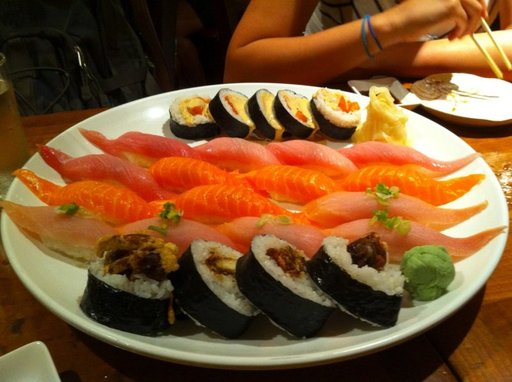

In [6]:
import random
from PIL import Image
image_path_list = list(IMAGE_PATH.glob('*/*/*.jpg'))
random_image_path = random.choice(image_path_list)
random_image_path

img = Image.open(random_image_path)
img_class = random_image_path.parent.stem
print(f'Image name is {img_class}')
print(f'Image height is {img.height}')
print(f'Image width is {img.width}')
img

<Figure size 1400x900 with 0 Axes>

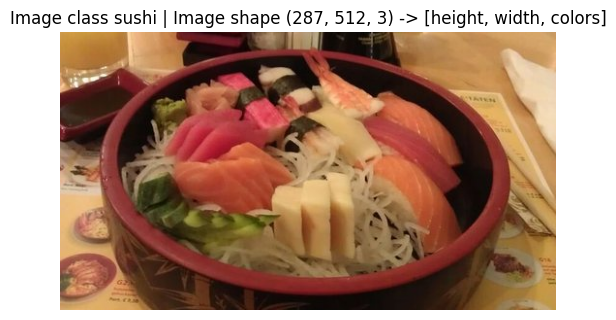

<Figure size 1400x900 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
import numpy as np

img_as_array = np.asarray(img)
plt.imshow(img_as_array)
plt.title(f"Image class {img_class} | Image shape {img_as_array.shape} -> [height, width, colors]")
plt.axis(False)
plt.figure(figsize=(14,9))

array([[[209, 157,  81],
        [208, 156,  80],
        [207, 156,  77],
        ...,
        [202, 155, 101],
        [201, 154, 100],
        [200, 153,  99]],

       [[208, 156,  80],
        [207, 155,  79],
        [206, 155,  76],
        ...,
        [202, 155, 101],
        [201, 154, 100],
        [201, 154, 100]],

       [[207, 155,  79],
        [206, 154,  78],
        [205, 154,  75],
        ...,
        [202, 155, 101],
        [204, 154, 101],
        [203, 153, 100]],

       ...,

       [[210, 161, 105],
        [209, 160, 102],
        [209, 160, 104],
        ...,
        [192, 151,  72],
        [194, 152,  70],
        [194, 152,  68]],

       [[213, 163, 110],
        [211, 164, 110],
        [211, 164, 110],
        ...,
        [190, 151,  72],
        [192, 151,  69],
        [194, 152,  68]],

       [[214, 167, 115],
        [213, 167, 115],
        [213, 167, 115],
        ...,
        [190, 151,  72],
        [192, 152,  67],
        [193, 153,  66]]], dtype=uint8)
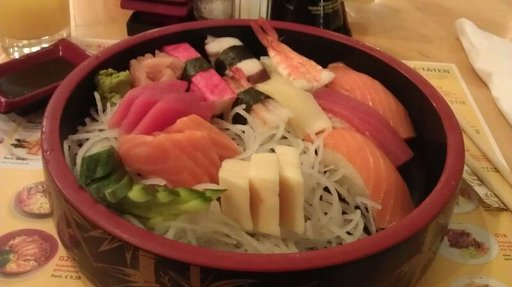

In [8]:
img_as_array

In [9]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

data_transform(img)

tensor([[[0.8078, 0.8118, 0.8000,  ..., 0.8392, 0.8196, 0.7922],
         [0.7961, 0.7961, 0.7843,  ..., 0.8392, 0.8353, 0.8157],
         [0.7882, 0.7843, 0.7686,  ..., 0.8353, 0.8353, 0.8353],
         ...,
         [0.5686, 0.5725, 0.6510,  ..., 0.7294, 0.7569, 0.7608],
         [0.7451, 0.7451, 0.7922,  ..., 0.7333, 0.7529, 0.7569],
         [0.8118, 0.8275, 0.8549,  ..., 0.7137, 0.7608, 0.7529]],

        [[0.6039, 0.6078, 0.6000,  ..., 0.6510, 0.6392, 0.6118],
         [0.5882, 0.5843, 0.5765,  ..., 0.6471, 0.6510, 0.6353],
         [0.5725, 0.5647, 0.5490,  ..., 0.6392, 0.6510, 0.6510],
         ...,
         [0.4078, 0.3922, 0.4549,  ..., 0.5765, 0.6000, 0.5961],
         [0.5765, 0.5843, 0.6157,  ..., 0.6196, 0.6118, 0.5922],
         [0.6314, 0.6471, 0.6667,  ..., 0.6039, 0.6431, 0.6039]],

        [[0.2863, 0.2706, 0.2588,  ..., 0.4118, 0.4235, 0.3961],
         [0.2667, 0.2549, 0.2471,  ..., 0.4157, 0.4235, 0.4078],
         [0.2471, 0.2392, 0.2314,  ..., 0.4118, 0.4157, 0.

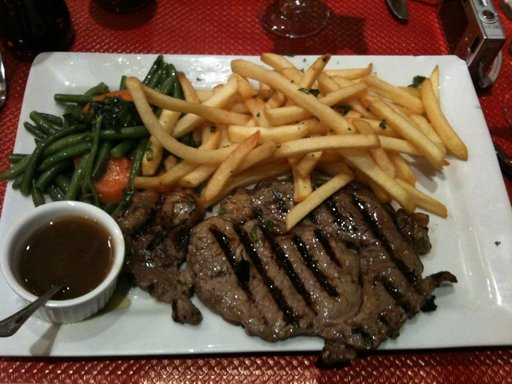

In [10]:
Image.open(image_path_list[78])

In [11]:
def plot_transform_images(
    image_path_list: list,
    transform,
    n=3,
    seed=None
):
  if seed:
    torch.manual_seed(seed)
  rand_img_path_list = random.sample(image_path_list, k=n)
  for rand_img in rand_img_path_list:
    with Image.open(rand_img) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original Image\nSize: {f.size}")
      ax[0].axis(False)

      transformed_img = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_img)
      ax[1].set_title(f"Transformed Image\nShape: {transformed_img.shape}")
      ax[1].axis("off")

      class_name = rand_img.parent.stem
      fig.suptitle(f"Class: {class_name}", fontsize=16)


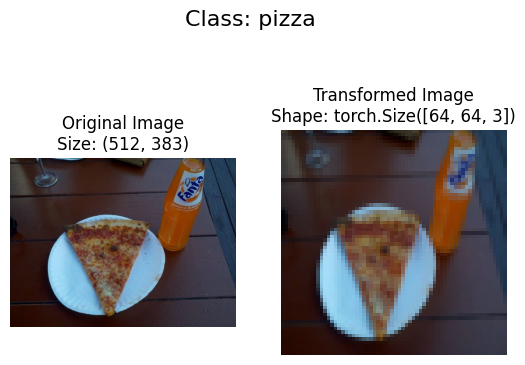

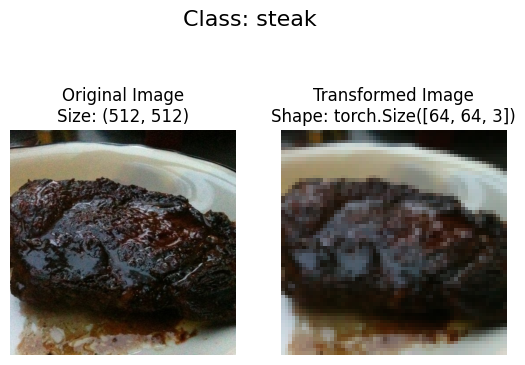

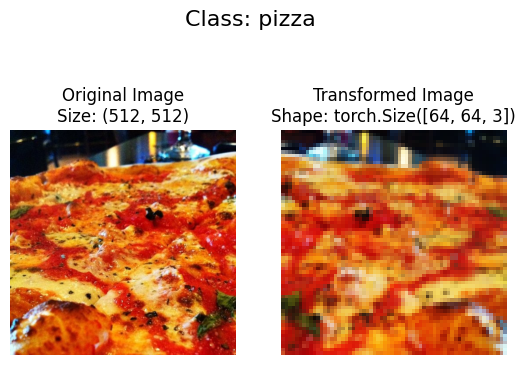

In [12]:
plot_transform_images(image_path_list, data_transform, seed=42)

In [13]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

In [14]:
len(train_data), len(test_data)

(225, 75)

In [15]:
img, label = train_data[0][0], train_data[0][1]

print(f"Train data shape -> {img.size}")
print(f"Image shape -> {img.shape}")
print(f"Image dtype -> {img.dtype}")
print(f"Label type -> {type(label)}")
print(f"Image tensor -> {img}")

Train data shape -> <built-in method size of Tensor object at 0x7c2f8d47e750>
Image shape -> torch.Size([3, 64, 64])
Image dtype -> torch.float32
Label type -> <class 'int'>
Image tensor -> tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

In [16]:
class_dict = train_data.class_to_idx

In [17]:
class_names = train_data.classes


In [18]:
img_permuted = img.permute(1,2,0)

(-0.5, 63.5, 63.5, -0.5)

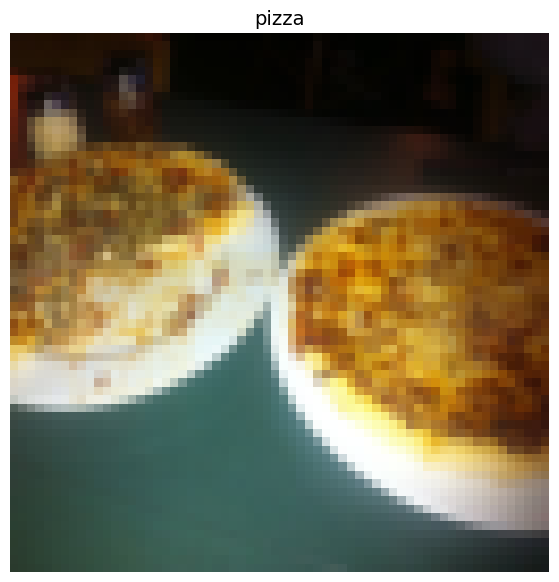

In [19]:
plt.figure(figsize=(10,7))
plt.title(class_names[label], fontsize=14)
plt.imshow(img_permuted)
plt.axis("off")

In [20]:
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [21]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               num_workers=os.cpu_count())

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count())

In [22]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [23]:
img, label = next(iter(train_dataloader))